# Examples
First import the code from `src`, and then import/set a few things to make our visualisations look nice

In [1]:
from src.scrape_weather import *

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
sns.set_palette('gray')
plt.rcParams['figure.figsize'] = (12,9)

# Simple Start
Lets start by scraping weather data for January 2017. The `get_weather()` function returns a pandas DataFrame, so we can fetch summary statistics and perform data transformations in all of the usual ways.

In [3]:
jan_17 = get_weather(2017, 1)
jan_17.head()

/home/harrisonpim/Downloads/Code/Personal/weather/src/scrape_weather.py:160: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  convert_numeric=True))


,Dew Point (°C) AVG,Dew Point (°C) HIGH,Dew Point (°C) LOW,Events,Humidity (%) AVG,Humidity (%) HIGH,Humidity (%) LOW,Precip. (mm),Sea Level Press. (hPa) AVG,Sea Level Press. (hPa) HIGH,Sea Level Press. (hPa) LOW,Temp. (°C) AVG,Temp. (°C) HIGH,Temp. (°C) LOW,Visibility (km) AVG,Visibility (km) HIGH,Visibility (km) LOW,Wind (km/h) AVG,Wind (km/h) HIGH,Wind (km/h) LOW
Date,,,,,,,,,,,,,,,,,,,,
2017-01-01,6,9,3,Rain,95,100,78,5.08,1019,1024,1014,7,10,4,9,27,5,13,23,37.0
2017-01-02,1,4,-2,,87,100,62,0.00,1028,1031,1023,2,5,-1,12,26,10,10,14,NaN
2017-01-03,0,2,-3,,87,100,64,0.25,1028,1030,1024,1,6,-3,13,31,9,11,24,NaN
2017-01-04,1,5,-2,Rain,74,87,49,0.00,1026,1030,1023,4,8,1,11,31,10,14,23,NaN
2017-01-05,-2,1,-3,,80,100,56,0.00,1034,1038,1031,2,6,-3,11,19,5,5,10,NaN


To prove that we've collected the appropriate data, lets check the start and end dates for our sample

In [4]:
jan_17.index.min()

Timestamp('2017-01-01 00:00:00')

In [5]:
jan_17.index.max()

Timestamp('2017-01-31 00:00:00')

Looks good to me

We can see how the average temperature changes throughout the month by plotting the data

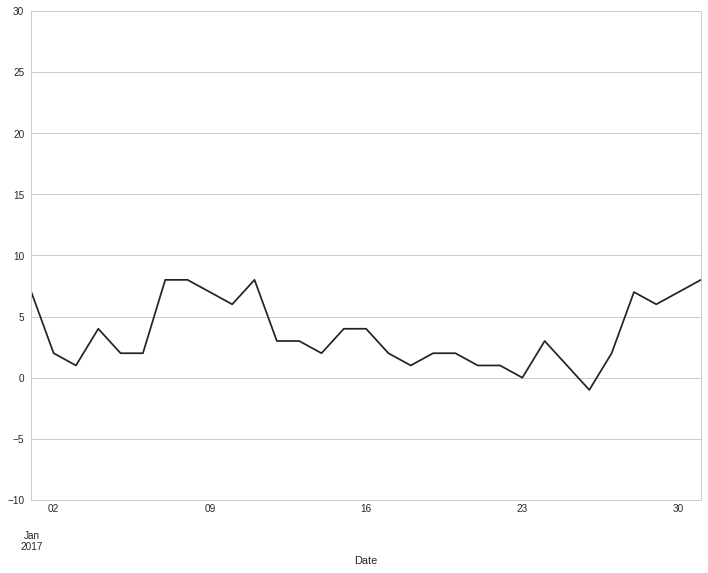

In [6]:
ax = jan_17['Temp. (°C) AVG'].plot();
ax.set_ylim(-10, 30);

# Larger Samples
We can isolate the weather data for the first 6 months of 2017:

In [7]:
six_months = get_weather_multiple_months(years=2017, months=range(1,7))

/home/harrisonpim/Downloads/Code/Personal/weather/src/scrape_weather.py:160: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  convert_numeric=True))


Again, we can have a look at how the temperatures etc. change throughout the specified time period

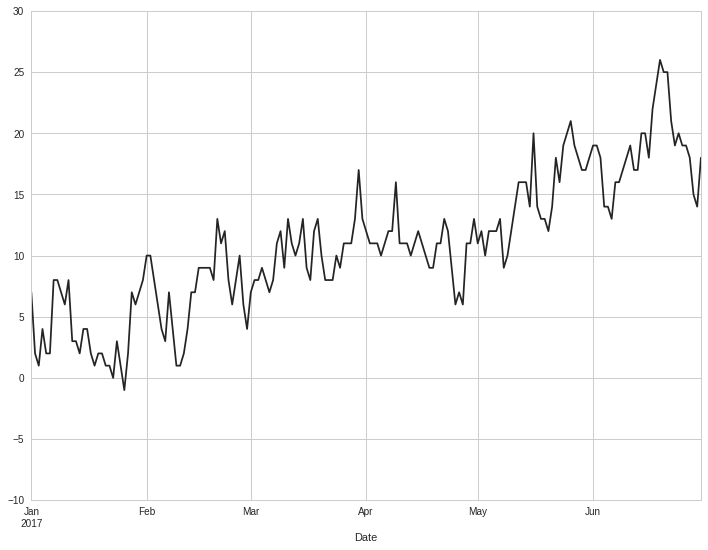

In [8]:
ax = six_months['Temp. (°C) AVG'].plot();
ax.set_ylim(-10, 30);

# Playing with pandas

We can define new metrics using out existing data, like the daily range in temperature. This action adds a new column to our DataFrame

In [42]:
six_months['Temp. (°C) RANGE'] = six_months['Temp. (°C) HIGH'] - six_months['Temp. (°C) LOW']

We can take a look at the range within the columns themselves

In [41]:
print('range highs:\t', six_months['Temp. (°C) HIGH'].max() - six_months['Temp. (°C) HIGH'].min())
print('range lows:\t', six_months['Temp. (°C) LOW'].max() - six_months['Temp. (°C) LOW'].min())

range highs:	 34
range lows:	 23


We can plot the variables against one another to check for correlations. Picking an obvious one here

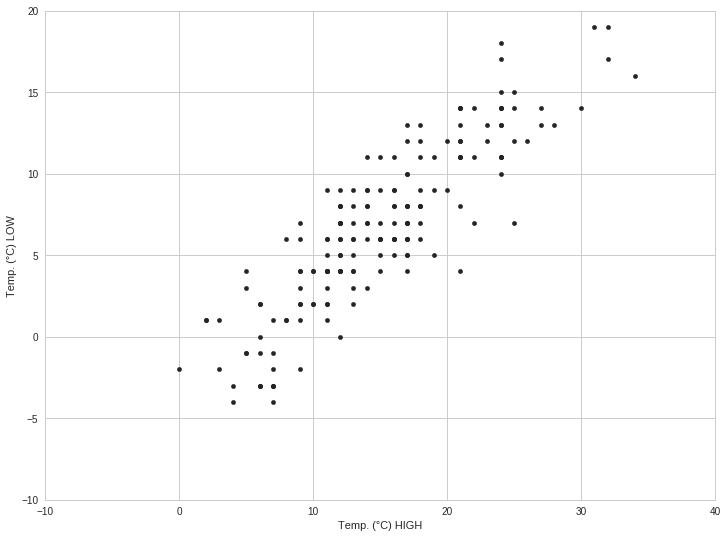

In [43]:
ax = six_months.plot.scatter(x='Temp. (°C) HIGH', y='Temp. (°C) LOW')
ax.set_xlim(-10, 40);
ax.set_ylim(-10, 20);

The data in those scatter plots exist on an integer grid, so we can't see any of the inherent overplotting where duplicate combinations exist. We can get over that by using a (very pretty) seaborn KDE plot, which also tells us the strength of the correlation between the two variables

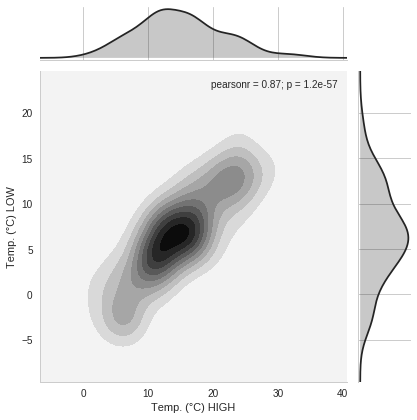

In [44]:
sns.jointplot(x='Temp. (°C) HIGH', y='Temp. (°C) LOW', data=six_months, kind='kde');

### Slicing
We can slice up the data by date or date-specific metadata

In [45]:
six_months[six_months.index.month == 3].head()

,Dew Point (°C) AVG,Dew Point (°C) HIGH,Dew Point (°C) LOW,Events,Humidity (%) AVG,Humidity (%) HIGH,Humidity (%) LOW,Precip. (mm),Sea Level Press. (hPa) AVG,Sea Level Press. (hPa) HIGH,...,Temp. (°C) AVG,Temp. (°C) HIGH,Temp. (°C) LOW,Visibility (km) AVG,Visibility (km) HIGH,Visibility (km) LOW,Wind (km/h) AVG,Wind (km/h) HIGH,Wind (km/h) LOW,Temp. (°C) RANGE
Date,,,,,,,,,,,,,,,,,,,,,
2017-03-01,4,6,1,Rain,80,95,57,0.51,998,1000,...,7,9,4,12,31,6,19,42,NaN,5
2017-03-02,1,4,-6,,60,87,24,0.00,1008,1013,...,8,12,4,12,31,10,32,47,64.0,8
2017-03-03,7,9,4,"Rain,Thunderstorm",87,100,74,2.03,998,1010,...,8,11,4,11,19,7,14,23,NaN,7
2017-03-04,6,8,2,Rain,79,100,41,0.25,989,993,...,9,12,7,13,31,9,14,29,45.0,5
2017-03-05,4,7,2,Rain,79,93,57,4.06,991,999,...,8,11,6,12,31,2,24,39,60.0,5


In [46]:
six_months[six_months.index.weekday_name == 'Wednesday'].head()

,Dew Point (°C) AVG,Dew Point (°C) HIGH,Dew Point (°C) LOW,Events,Humidity (%) AVG,Humidity (%) HIGH,Humidity (%) LOW,Precip. (mm),Sea Level Press. (hPa) AVG,Sea Level Press. (hPa) HIGH,...,Temp. (°C) AVG,Temp. (°C) HIGH,Temp. (°C) LOW,Visibility (km) AVG,Visibility (km) HIGH,Visibility (km) LOW,Wind (km/h) AVG,Wind (km/h) HIGH,Wind (km/h) LOW,Temp. (°C) RANGE
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-04,1,5,-2,Rain,74,87,49,0.00,1026,1030,...,4,8,1,11,31,10,14,23,NaN,7
2017-01-11,4,10,-2,,72,100,39,0.00,1011,1015,...,8,11,6,11,19,6,18,29,50.0,5
2017-01-18,-3,0,-7,,75,100,30,0.00,1038,1040,...,1,6,-3,9,31,2,3,8,NaN,9
2017-01-25,1,4,-3,Fog,98,100,91,0.25,1027,1029,...,1,3,-2,3,8,0,5,16,NaN,5
2017-02-01,10,11,8,Rain,96,100,80,1.02,1006,1011,...,10,12,8,9,31,2,14,24,35.0,4


or by the content of the rows themselves

In [47]:
six_months[six_months['Precip. (mm)'] > 5].head()

,Dew Point (°C) AVG,Dew Point (°C) HIGH,Dew Point (°C) LOW,Events,Humidity (%) AVG,Humidity (%) HIGH,Humidity (%) LOW,Precip. (mm),Sea Level Press. (hPa) AVG,Sea Level Press. (hPa) HIGH,...,Temp. (°C) AVG,Temp. (°C) HIGH,Temp. (°C) LOW,Visibility (km) AVG,Visibility (km) HIGH,Visibility (km) LOW,Wind (km/h) AVG,Wind (km/h) HIGH,Wind (km/h) LOW,Temp. (°C) RANGE
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,6,9,3,Rain,95,100,78,5.08,1019,1024,...,7,10,4,9,27,5,13,23,37.0,6
2017-01-12,2,5,-1,"Rain,Snow",83,100,64,13.97,1005,1015,...,3,7,1,10,31,2,18,26,NaN,6
2017-02-06,3,5,-1,"Fog,Rain",90,100,62,6.10,1017,1020,...,3,7,-1,8,27,2,8,21,NaN,8
2017-02-27,5,8,1,Rain,87,93,73,6.10,990,1001,...,6,9,3,11,31,5,19,35,48.0,6
2017-05-17,14,16,11,Rain,95,100,85,17.02,1017,1023,...,14,17,12,10,31,5,10,16,NaN,5


In [48]:
six_months[six_months['Events'].str.contains('Snow')].head()

,Dew Point (°C) AVG,Dew Point (°C) HIGH,Dew Point (°C) LOW,Events,Humidity (%) AVG,Humidity (%) HIGH,Humidity (%) LOW,Precip. (mm),Sea Level Press. (hPa) AVG,Sea Level Press. (hPa) HIGH,...,Temp. (°C) AVG,Temp. (°C) HIGH,Temp. (°C) LOW,Visibility (km) AVG,Visibility (km) HIGH,Visibility (km) LOW,Wind (km/h) AVG,Wind (km/h) HIGH,Wind (km/h) LOW,Temp. (°C) RANGE
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-12,2,5,-1,"Rain,Snow",83,100,64,13.97,1005,1015,...,3,7,1,10,31,2,18,26,NaN,6
2017-01-13,-1,0,-2,"Rain,Snow",75,93,51,0.25,1009,1018,...,3,6,0,12,27,4,21,35,60.0,6
2017-02-09,0,1,-1,"Rain,Snow",86,100,71,0.00,1027,1030,...,1,2,1,8,13,1,11,16,NaN,1
2017-02-10,1,2,-2,"Rain,Snow",93,100,73,0.25,1024,1025,...,1,2,1,4,11,1,11,14,NaN,1
2017-02-11,1,2,-1,"Rain,Snow",92,100,76,0.51,1022,1024,...,2,3,1,5,18,3,11,16,NaN,2


### Making this useful
Obviously the interesting-ness of this stuff by itself is limited. Combining this kind of data with other sources is where it really gets interesting.  
Most of the data which might be connected to weather are datetime-indexed, or can be transformed to become so. Hopefully the structure of these scraped dataframes will make integrating this data with other work quick and painless